In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [3]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [4]:
filepath = "/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_new_visc.scratch/"

In [5]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 40
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'V.(b x grad(psi))', 'V.grad(psi)', 'V||', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [6]:
B1 = pxr.load_array(1,0,0,40)
B2 = pxr.load_array(1,1,0,40)
B3 = pxr.load_array(1,2,0,40)
psi_pol = pxr.load_array(3,4,0,40)

In [41]:
B1t = np.mean(B1,axis=2)
B2t = np.mean(B2,axis=2)
B3t = np.mean(B3,axis=2)

In [42]:
dB1 = B1[:,:,:,:] - B1t[:,:,np.newaxis,:]
dB2 = B2[:,:,:,:] - B2t[:,:,np.newaxis,:]
dB3 = B3[:,:,:,:] - B3t[:,:,np.newaxis,:]

## Growth Rate

In [74]:
np.polyfit(time_list[35:38],np.log(dB3[90,0,0,35:38]),deg=1)

array([  0.56809214, -25.08303218])

In [81]:
small_t = np.asarray(time_list[35:38])
line = - 25.08303218 + 0.56809214*small_t

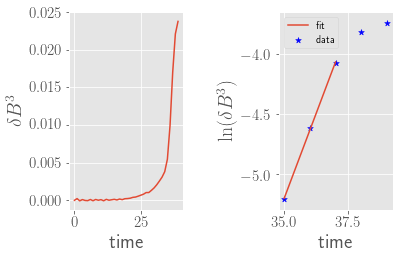

In [101]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(time_list,dB3[90,0,0,:])
ax1.set_xlabel("time")
ax1.set_ylabel(r"$\delta B^3$")
ax2.scatter(time_list[35:],np.log(dB3[90,0,0,35:]),marker='*',color = "b",label="data")
ax2.plot(small_t,line,label="fit")
ax2.set_xlabel("time")
ax2.set_ylabel(r"$\ln(\delta B^3)$")
plt.tight_layout()
plt.legend()
plt.show()

In [7]:
psi_pol.shape

(129, 65, 33, 40)

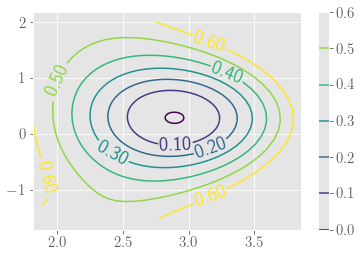

In [8]:
CS = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_pol[:,:,0,0])
plt.clabel(CS,fmt="%1.2f")
plt.colorbar()
plt.show()

In [9]:
time_list = [x for x in range(40)]
psin_list = np.linspace(0.0,1.0,101)

In [24]:
q = -np.load(filepath+"q_mpi_DF.npy")

In [32]:
b_hat_rho = np.load(filepath + "b_hat_rho_mpi_DF.npy")

In [25]:
idx11 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(1./1.)))).flatten()
idx21 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./1.)))).flatten()
idx31 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./1.)))).flatten()
idx41 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(4./1.)))).flatten()
idx51 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./1.)))).flatten()

In [33]:
b_hat_rho.shape

(101, 65, 33, 4)

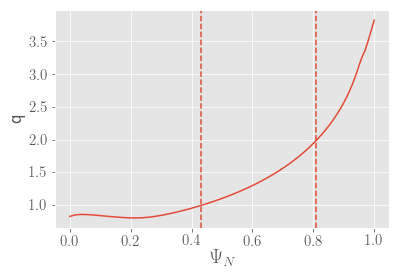

In [27]:
plt.plot(psin_list[:],q[:,0])
plt.axvline(psin_list[idx11],linestyle='dashed')
plt.axvline(psin_list[idx21],linestyle='dashed')
plt.xlabel(r'$\Psi_N$')
plt.ylabel(r'q')
plt.show()

In [28]:
#bnmt = pxr.nm_array(b_hat_rho)

In [17]:
bnmt = np.fft.fft2(b_hat_rho,axes=(1,2))

In [37]:
psin_list.shape

(101,)

In [18]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [38]:
def anim():
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_title(r'(1,1) kink')
    ax.set_xlabel(r'$\Psi_N$')
    ax.set_ylabel(r'Im($\hat{b}^{\rho}_{m/n}$)')
    ax.plot([],[],'r',label='n=1,m=1')
    ax.plot([],[],'b',label='n=1,m=2')
    ax.plot([],[],'y',label='n=1,m=3')
    ax.plot([],[],'g',label='n=1,m=4')
    ax.plot([],[],'c',label='n=1,m=5')
    ax.axvline(psin_list[idx11],linestyle='dashed',color='r')
    ax.axvline(psin_list[idx21],linestyle='dashed',color='b')
    ax.axvline(psin_list[idx31],linestyle='dashed',color='y')
    #ax.axvline(psin_list[idx41],linestyle='dashed',color='g')
    
    ax.legend(loc=4)
    ims = []
    for time_stamp in range(4):
        im1, = ax.plot(psin_list[:],np.asarray(bnmt[:,1,-1,time_stamp]).imag,'r')
        im2, = ax.plot(psin_list[:],np.asarray(bnmt[:,2,-1,time_stamp]).imag,'b')
        im3, = ax.plot(psin_list[:],np.asarray(bnmt[:,3,-1,time_stamp]).imag,'y')
        im4, = ax.plot(psin_list[:],np.asarray(bnmt[:,4,-1,time_stamp]).imag,'g')
        im5, = ax.plot(psin_list[:],np.asarray(bnmt[:,5,-1,time_stamp]).imag,'c')
        text = 't = '+str(time_stamp)

        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        ims.append([im1]+[im2]+[im3]+[im4]+[im5]+[an])

    art_ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=100,blit=False)
    return art_ani

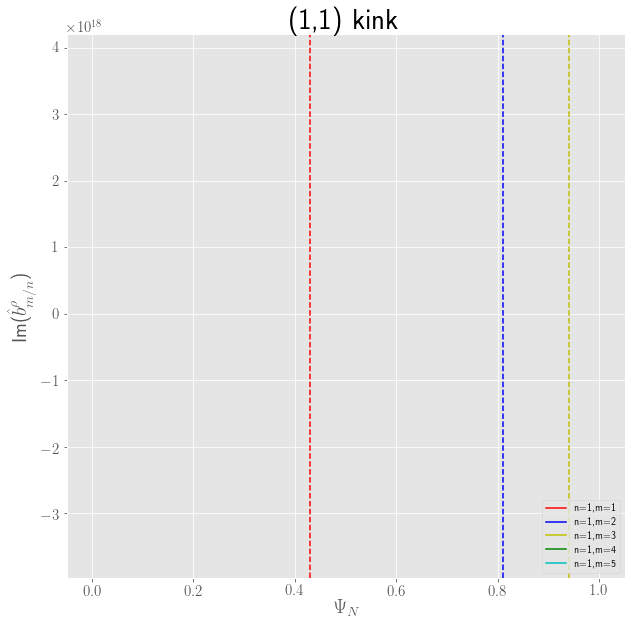

In [39]:
ani = anim();

In [40]:
HTML(ani.to_html5_video())